In [1]:
#This program will be using the Double Exponential Moving Average (DEMA) to determine when to buy/sell a particular stock to break even or secure a profit

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
#Loading the stock data
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN.csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800\n2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200\n2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100\n2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500\n2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3379.389893,3281800\n2021-04-13,3400.850098,3432.000000,3395.629883,3400.000000,3400.000000,3315800\n2021-04-14,3404.040039,3404.129883,3326.000000,3333.000000,3333.000000,3145200\n2021-04-15,3371.000000,3397.000000,3352.000000,3379.090088,3379.090088,3233600\n2021-04-16,3380.000000,3406.800049,3355.590088,3399.439941,3399.439941,3186000\n2021-04-19,3390.330078,3435.929932,3360.159912,3372.010010,3372.010010,2725400\n2021-04-20,3373.600098,3382.989990,3316.000000,3334.689941,3334.689941,2623000\n2021-04-21,3316.000000,3362.860107,3303.810059,3362.020020,336

In [4]:
#Storing the loaded data
dtf = pd.read_csv("AMZN.csv")




In [5]:

#Presenting the values
dtf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
1,2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
2,2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
3,2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500
4,2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3379.389893,3281800
...,...,...,...,...,...,...,...
249,2022-03-30,3370.189941,3379.010010,3310.000000,3326.020020,3326.020020,2808400
250,2022-03-31,3328.899902,3329.899902,3259.070068,3259.949951,3259.949951,2998300
251,2022-04-01,3282.989990,3316.540039,3246.389893,3271.199951,3271.199951,2851800
252,2022-04-04,3282.500000,3367.889893,3264.110107,3366.929932,3366.929932,2494100


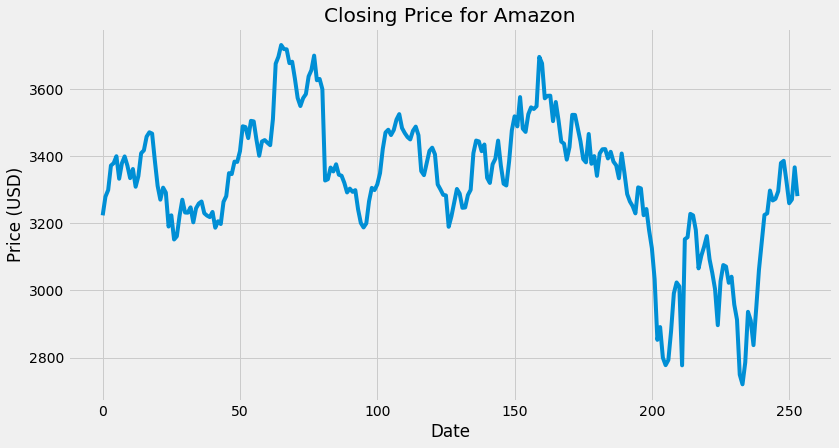

In [6]:
#Displaying the closing prices
dtf['Close'].plot(figsize=(12.2, 6.4))
plt.title('Closing Price for Amazon')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

In [7]:
#Creating a function to obtain the DEMA for Amazon
def DEMA(data, time_period, column):
  #Calculating the DEMA
  EMA = data[column].ewm(span=time_period, adjust = False).mean()
  DEMA = 2 * EMA - EMA.ewm(span=time_period, adjust = False).mean()

  return DEMA
  

In [13]:
#Storing the short term DEMA(20 Days) and the Long Term DEMA(50 Days) into the Data Set
dtf['DEMA_short'] = DEMA(dtf, 20, 'Adj Close')
dtf['DEMA_long'] = DEMA(dtf, 50, 'Adj Close')



In [8]:
dtf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-06,3223.750000,3247.310059,3217.040039,3223.820068,3223.820068,2537800
1,2021-04-07,3233.800049,3303.610107,3223.649902,3279.389893,3279.389893,3346200
2,2021-04-08,3310.899902,3324.500000,3292.000000,3299.300049,3299.300049,2812100
3,2021-04-09,3304.699951,3372.199951,3288.899902,3372.199951,3372.199951,4341500
4,2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3379.389893,3281800
...,...,...,...,...,...,...,...
249,2022-03-30,3370.189941,3379.010010,3310.000000,3326.020020,3326.020020,2808400
250,2022-03-31,3328.899902,3329.899902,3259.070068,3259.949951,3259.949951,2998300
251,2022-04-01,3282.989990,3316.540039,3246.389893,3271.199951,3271.199951,2851800
252,2022-04-04,3282.500000,3367.889893,3264.110107,3366.929932,3366.929932,2494100


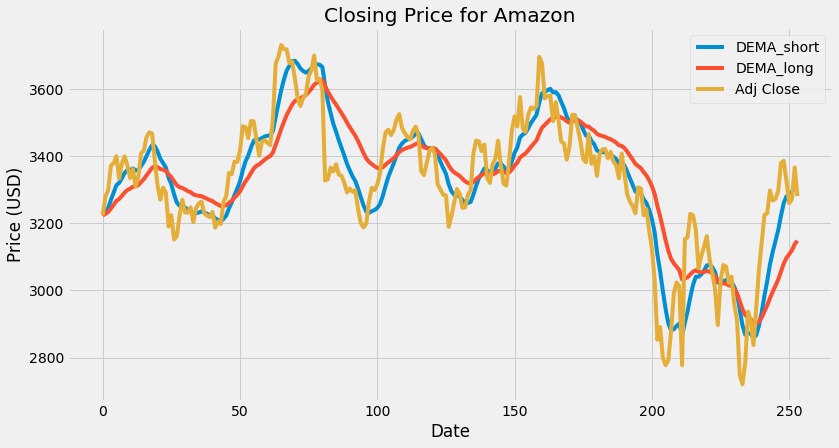

In [14]:
#Plotting the chart
column_list = ['DEMA_short','DEMA_long', 'Adj Close']
dtf[column_list].plot(figsize=(12.2, 6.4))
plt.title('Closing Price for Amazon')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

In [10]:
#Creating a function to indicate when to sell/buy the stock
def DEMA_Strategy(data):
  buy_list = []
  sell_list = []
  flag = False
  #Looping through the data
  for i in range(0, len(dtf)):
    if data.iloc[i,7]> data.iloc[i,8] and flag==False:
      buy_list.append(data.iloc[i,4])
      sell_list.append(np.nan)
      flag = True
    elif data.iloc[i,7] < data.iloc[i,8] and flag==True:
      buy_list.append(np.nan)
      sell_list.append(data.iloc[i,4])
      flag = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

    #Store the buy and sell signals into the data set
  data['Buy'] = buy_list
  data['Sell'] = sell_list

  





In [ ]:
#Implementing the strategy
DEMA_Strategy(dtf)



In [15]:
#Plotting the graph

plt.figure(figsize = (15,6))
plt.scatter(dtf.index, dtf['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(dtf.index, dtf['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.plot(dtf['Close'], label = 'Close Price', alpha = 0.35)
plt.plot(dtf['DEMA_short'], label = 'DEMA Short', alpha = 0.35)
plt.plot(dtf['DEMA_long'], label = 'DEMA Long', alpha = 0.35)
plt.xticks(rotation = 45)
plt.title("Buying and Selling Signals")
plt.xlabel('Day', fontsize = 19)
plt.ylabel('Closing Price', fontsize = 19)
plt.legend(loc = 'upper left')
plt.show

KeyError: ignored

<Figure size 1080x432 with 0 Axes>